In [ ]:
import shapely
##shapely用几何操作，比如叠加，缓冲区

In [73]:
import numpy as np

In [ ]:
import pyproj
##用来重投影

In [62]:
import geopandas as gpd

In [ ]:
from shapely.geometry import Point, LineString, Polygon, multipolygon, GeometryCollection
import 

<class 'shapely.geometry.point.Point'>


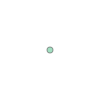

In [5]:
pt1 = Point(1,0)
print(type(pt1))
pt1

<class 'shapely.geometry.linestring.LineString'>


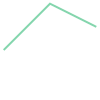

In [6]:
line1 = LineString([(1,0),(3,2),(5,1)])
print(type(line1))
line1

<class 'shapely.geometry.polygon.Polygon'>
3.0
9.18760072786364
POINT (3 1)
(1.0, 0.0, 5.0, 2.0)


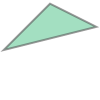

In [22]:
poly1=Polygon([(1,0),(3,2),(5,1)])
print(type(poly1))
print(poly1.area)
print(poly1.length)
print(poly1.centroid)
print(poly1.bounds)
poly1

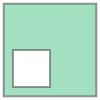

In [23]:
exterior=[(0,0),(0,1),(1,1,),(1,0)]
hole =[[(0.1,0.1),(0.1,0.5),(0.5,0.5),(0.5,0.1)]]
poly2= Polygon(exterior,hole)
poly2

In [24]:
mpoly = multipolygon([poly1,poly2])
mpoly

TypeError: 'module' object is not callable

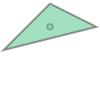

In [27]:
pt_centroid = poly1.centroid
geos = GeometryCollection([poly1,pt_centroid])
geos

In [ ]:
pt_wgs84 = Point(115,30)
transform = pyproj.Transformer.from_crs(4326, 32648, always_xy=True).transform
pt_utm48 = transform(transformer, pt_wgs84)
print(pt_utm48)

In [31]:
pt = Point(3,0)
dist = pt1.distance(pt)
print(dist)

dist = pt.distance(line1)
print(dist)

dist = pt.distance(poly1)
print(dist)

2.0
1.4142135623730951
0.48507125007266594


In [37]:
pt1_centroid = poly1.centroid
aa=poly1.contains(pt1_centroid)
a=poly1.contains(pt)
print(aa)
print(a)

True
False


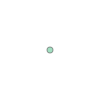

In [38]:
pt1

In [40]:
pt1_buffer= pt1.buffer(1, cap_style='round')

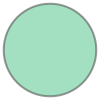

In [42]:
pt1_buffer

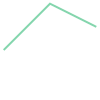

In [43]:
line1

In [45]:
line1_buf = line1.buffer(1)

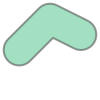

In [46]:
line1_buf

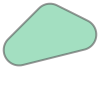

In [48]:
poly1_buf = poly1.buffer(1)
poly1_buf

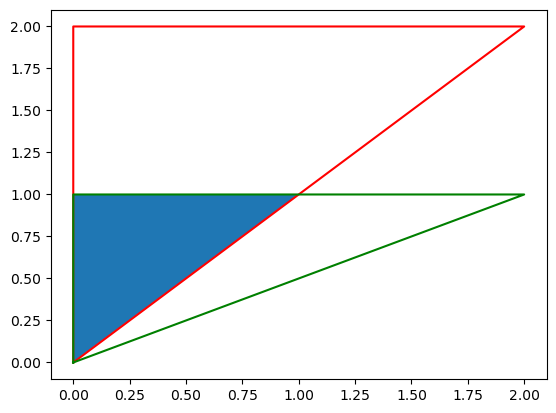

In [53]:
from shapely import intersection
import matplotlib.pyplot as plt

poly1 = Polygon([(0,0),(0,2),(2,2)])
poly2 = Polygon([(0,0),(0,1),(2,1)])
poly_inter = intersection(poly1, poly2)
plt.plot(poly1.exterior.xy[0],poly1.exterior.xy[1], color='red')
plt.plot(poly2.exterior.xy[0],poly2.exterior.xy[1],color='green')
plt.fill(poly_inter.exterior.xy[0],poly_inter.exterior.xy[1])



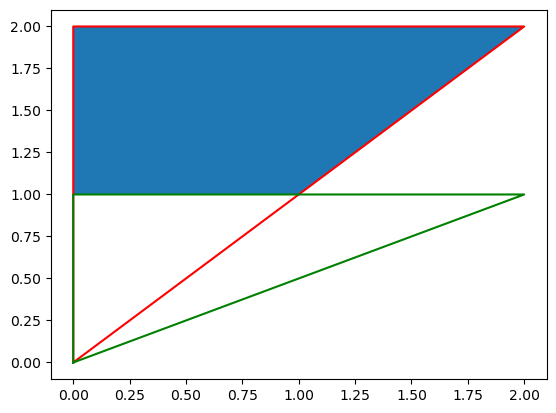

In [55]:
dif_poly = poly1.difference(poly2)
plt.plot(poly1.exterior.xy[0],poly1.exterior.xy[1], color='red')
plt.plot(poly2.exterior.xy[0],poly2.exterior.xy[1],color='green')
plt.fill(dif_poly.exterior.xy[0],dif_poly.exterior.xy[1])

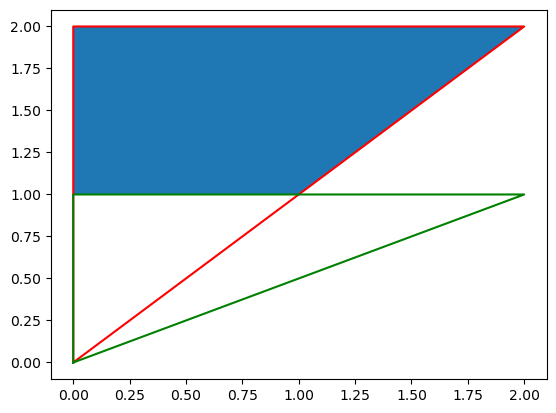

In [59]:
##两个几何面合并
dif_poly = poly1.difference(poly2)
plt.plot(poly1.exterior.xy[0],poly1.exterior.xy[1], color='red')
plt.plot(poly2.exterior.xy[0],poly2.exterior.xy[1],color='green')
plt.fill(dif_poly.exterior.xy[0], dif_poly.exterior.xy[1])

plt.show()



In [61]:
##pandas有标签，相较numpy
path_kunming='E:\开源\kunming.gpkg'

In [63]:
kunming_gpd=gpd.read_file(path_kunming)
kunming_gpd.head(3)

,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,pr_name,cn_adcode,cn_name,geometry
0,530102,五华区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.71 25.137, 102.72 25.137, ..."
1,530103,盘龙区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.72 25.045, 102.72 25.045, ..."
2,530111,官渡区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.72 25.033, 102.72 25.033, ..."


In [ ]:
ids_chenggong = np.where(kunming_gpd['dt_name']== 'chenggong')[0]
ids_chenggong
chenggong_gpd = kunming_gpd.iloc[ids_chenggong]##这里有错看视频

ValueError: aspect must be finite and positive 

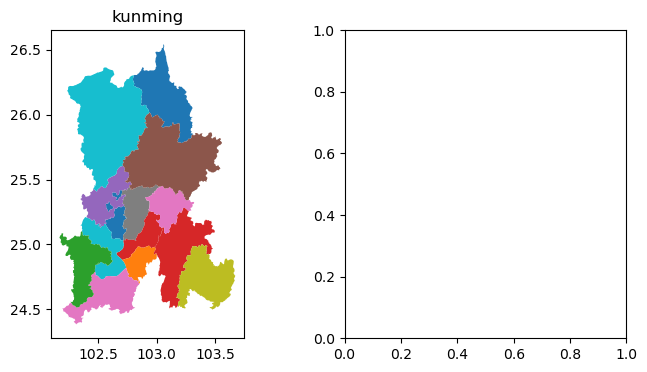

In [77]:
fig,ax= plt.subplots(1,2,figsize=(8,4))
kunming_gpd.plot(ax=ax[0],column='dt_name')
ax[0].set_title('kunming' )
chenggong_gpd.plot(ax=ax[0])
ax[0].set_title('chenggong' )

In [78]:
from shapely.geometry import Polygon

In [ ]:
dict ={'name':['region1'],'geometry':[Polygon([(101,25)(102.5,25.5),(103,25.5),(103,25)])]}
region_gpd = gpd.GeoDataFrame(dict, crs='EPSG:4326')
region_gpd


<>:1: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
<>:1: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
C:\Users\yj\AppData\Local\Temp\ipykernel_1460\398603627.py:1: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  dict ={'name':['region1'],'geometry':[Polygon([(102.5,25)(102.5,25.5),(103,25.5),(103,25)])]}
C:\Users\yj\AppData\Local\Temp\ipykernel_1460\398603627.py:1: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  dict ={'name':['region1'],'geometry':[Polygon([(102.5,25)(102.5,25.5),(103,25.5),(103,25)])]}
C:\Users\yj\AppData\Local\Temp\ipykernel_1460\398603627.py:1: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  dict ={'name':['region1'],'geometry':[Polygon([(102.5,25)(102.5,25.5),(103,25.5),(103,25)])]}
C:\Users\yj\AppData\Local\Temp\ipykernel_1460\398603627.py:1: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  

TypeError: 'tuple' object is not callable

In [80]:
region_clip=kunming_gpd.clip(region_gpd)
region_clip

NameError: name 'region_gpd' is not defined

NameError: name 'region_clip' is not defined

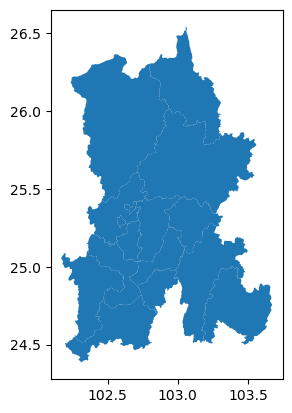

In [ ]:
ax = kunming_gpd.plot()
region_gpd.plot(ax=ax, facecolor='none',edgecolor='green')
region_clip.plot(ax=ax, facecolor='none',edgecolor='red')

In [ ]:
##矢量数据的合并
region_union = kunming_gpd.óverlay(region_gpd, how='union')
##region_gpd.plot(ax=ax, facecolor='none',edgecolor='green')
region_union.plot(ax=ax, facecolor='none',edgecolor='red')

In [85]:
##利用geopandas写出矢量数据
path_kunming_out_1 = 'E:\开源\11111.gpkg'
kunming_gpd_1 = kunming_gpd[['dt_name','geometry']]
kunming_gpd_1

,dt_name,geometry
0,五华区,"MULTIPOLYGON (((102.71 25.137, 102.72 25.137, ..."
1,盘龙区,"MULTIPOLYGON (((102.72 25.045, 102.72 25.045, ..."
2,官渡区,"MULTIPOLYGON (((102.72 25.033, 102.72 25.033, ..."
3,西山区,"MULTIPOLYGON (((102.51 24.86, 102.51 24.86, 10..."
4,东川区,"MULTIPOLYGON (((102.8 26.303, 102.81 26.303, 1..."
5,呈贡区,"MULTIPOLYGON (((102.85 24.698, 102.85 24.698, ..."
6,晋宁区,"MULTIPOLYGON (((102.74 24.817, 102.74 24.816, ..."
7,富民县,"MULTIPOLYGON (((102.64 25.368, 102.64 25.368, ..."
8,宜良县,"MULTIPOLYGON (((103.27 25.258, 103.27 25.255, ..."
9,石林彝族自治县,"MULTIPOLYGON (((103.67 24.724, 103.67 24.723, ..."


In [ ]:
##一种数据写出的方法
kunming_gpd_1.to_file(path_kunming_out_1)

In [87]:
##只想写出eg呈贡区的数据
path_kunming_out_2 = 'E:\开源\22222.gpkg'
kunming_out_2 = kunming_gpd.iloc[ids_chenggong]
kunming_out_2

,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,pr_name,cn_adcode,cn_name,geometry


In [88]:

kunming_out_2.to_file(path_kunming_out_2)